In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
reaction_1 = np.array([1, 0, 0])
reaction_2 = np.array([0, 1, 0])
reaction_3 = np.array([0, -2, 1])
reaction_4 = np.array([-1, 0, 0])
reaction_5 = np.array([0, -1, 0])

nu = np.array([reaction_1, reaction_2, reaction_3, reaction_4, reaction_5])

def propensity(x):
    return np.array([25, 1000*x[0], (1/1000)*x[1]*(x[1]-1), 0.1*x[0], x[2]])

Text(0, 0.5, 'Species Count')

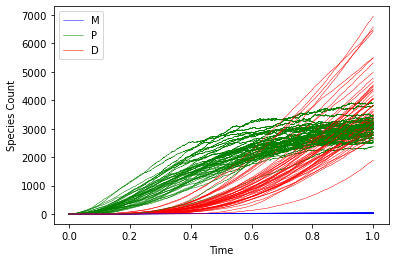

In [52]:
runs = 50
legend_labels = []

for run in range(runs):
    #initialisation
    x = np.array([0, 0, 0])
    t = 0
    T = 1
    x_t = np.array([x])
    time = np.array([0])
    reaction_count = [0, 0, 0, 0, 0]
    # np.random.seed(42)

    #SSA
    while(t < T):
        a = propensity(x)
        a0 = np.sum(a)

        r1 = np.random.uniform(0, 1)
        h = (1/a0)*np.log(1/r1)

        r2 = np.random.uniform(0, 1)
        decider = r2*a0
        a_sum = 0
        mu = None
        for i in range(a.size):
            if a_sum < decider and decider <= a_sum + a[i]:
                mu = i
                break
            a_sum = a_sum + a[i]

        reaction_count[mu] = reaction_count[mu] + 1

        x = x + nu[mu]
        t = t + h

        x_t = np.append(x_t, [x], axis = 0)
        time = np.append(time, t)

    M = x_t[:, 0]
    P = x_t[:, 1]
    D = x_t[:, 2]

    plt.plot(time, M, color = 'blue', label = 'M', linewidth=0.5)
    plt.plot(time, P, color = 'green', label = 'P', linewidth=0.5)
    plt.plot(time, D, color = 'red', label = 'D', linewidth=0.5)
    
    legend_labels.append(f'Run {run+1}')

plt.legend(['M', 'P', 'D'])  

plt.xlabel('Time')
plt.ylabel('Species Count')
